<a href="https://colab.research.google.com/github/RoPrince/Iris_Classification/blob/master/Iris_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(url, names=['sepallength','sepalwidth','petallength','petalwidth','target'])
iris.info()
iris.head(2)

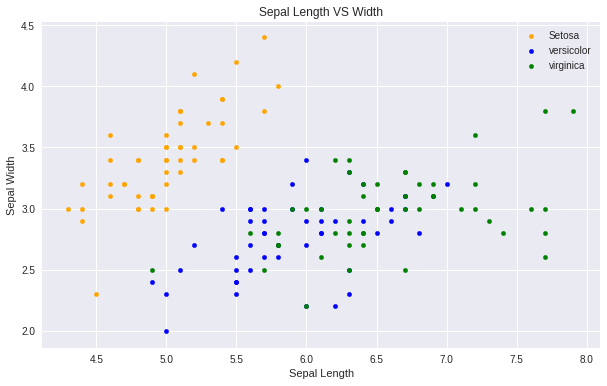

In [5]:
fig = iris[iris.target=='Iris-setosa'].plot(kind='scatter',x='sepallength',y='sepalwidth',color='orange', label='Setosa')
iris[iris.target=='Iris-versicolor'].plot(kind='scatter',x='sepallength',y='sepalwidth',color='blue', label='versicolor',ax=fig)
iris[iris.target=='Iris-virginica'].plot(kind='scatter',x='sepallength',y='sepalwidth',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

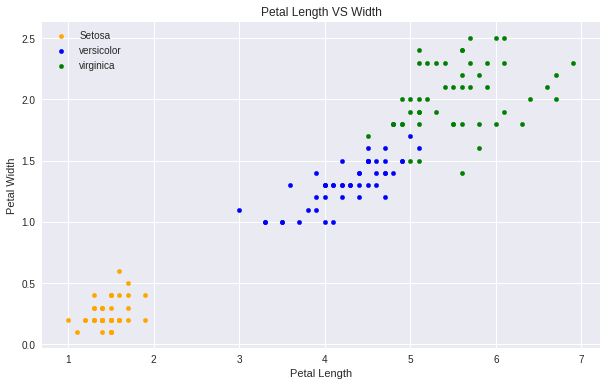

In [6]:
fig = iris[iris.target=='Iris-setosa'].plot(kind='scatter',x='petallength',y='petalwidth',color='orange', label='Setosa')
iris[iris.target=='Iris-versicolor'].plot(kind='scatter',x='petallength',y='petalwidth',color='blue', label='versicolor',ax=fig)
iris[iris.target=='Iris-virginica'].plot(kind='scatter',x='petallength',y='petalwidth',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

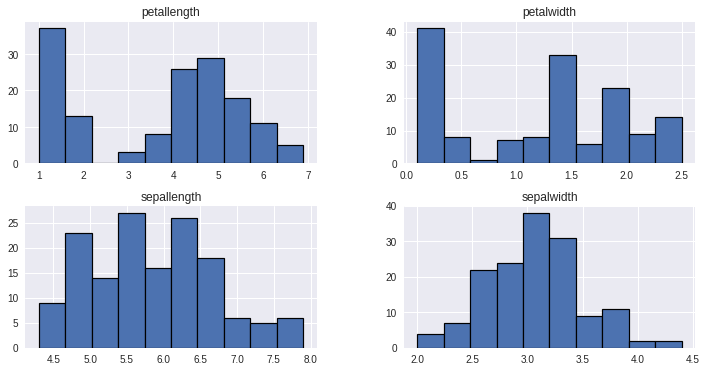

In [7]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


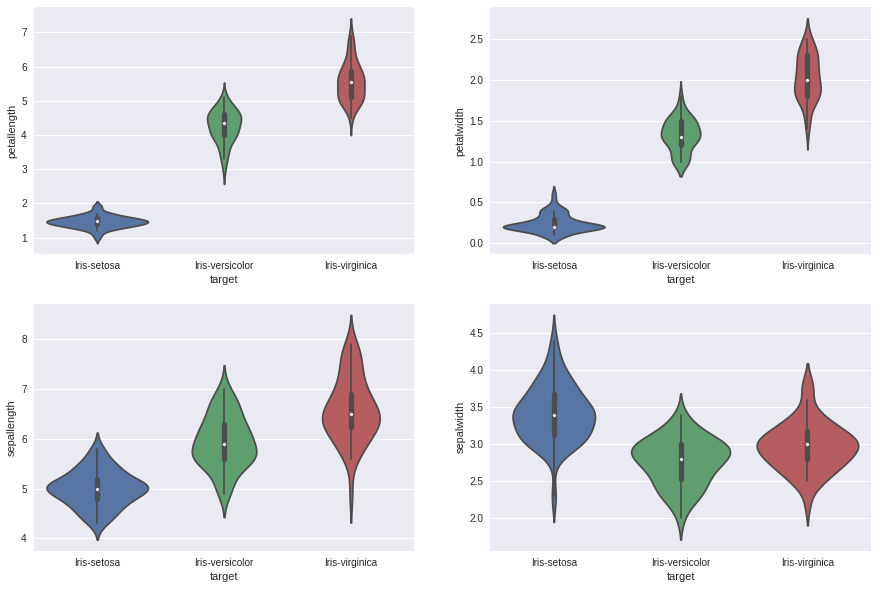

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='target',y='petallength',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='target',y='petalwidth',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='target',y='sepallength',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='target',y='sepalwidth',data=iris)

In [0]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm


In [15]:
!pip install -q sklearn.cross_validation

  Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: )
No matching distribution found for sklearn.cross_validation


In [11]:
iris.shape

(150, 5)

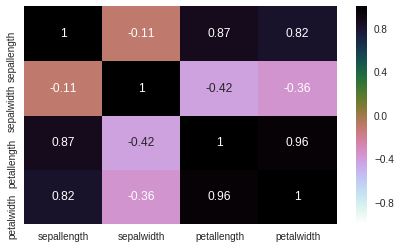

In [12]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [18]:
train, test = train_test_split(iris, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [0]:
train_X = train[['sepallength','sepalwidth','petallength','petalwidth']]# taking the training data features
train_y=train.target # output of our training data
test_X= test[['sepallength','sepalwidth','petallength','petalwidth']] # taking test data features
test_y =test.target   #output value of test data

In [24]:
train_X.head(2)
train_y.head(2)

48        Iris-setosa
127    Iris-virginica
Name: target, dtype: object

In [34]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

The accuracy of the SVM is: 0.9777777777777777


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print("The accuracy of LR is:" ,metrics.accuracy_score(prediction,test_y))

The accuracy of LR is: 0.9111111111111111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [32]:
model = DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print("The accuracy of DTC is:" ,metrics.accuracy_score(prediction,test_y))

The accuracy of DTC is: 0.9333333333333333
